In [1]:
# I am importing modules relevant to this project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# For colormaps used in this code; go to this link: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [2]:
# I am reading the original csv file into data frame using pandas method.
df = pd.read_csv("Goodreads_books_with_genres.csv")
df.head()

# The original file can be found here: https://www.kaggle.com/datasets/middlelight/goodreadsbookswithgenres

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Adve..."


In [3]:
# I am cheking the shape(rows x columns) of the data frame
df.shape

(11127, 13)

In [4]:
# It has been noted that the file had some missing values on genres column.
# I am clening missing values from the 'genres' column.
df = df.dropna(subset='genres')

In [5]:
# I am checking if any other missing values have left.
df.dropna(axis= 'index', how = 'all')
df.dropna(axis = 'columns', how = 'all')
# Apparently, there's none.

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Adve..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,"Fiction;Writing,Essays;Literature,American;The..."
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,Fiction;Science Fiction;Literature;Novels;Lite...
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,"Historical,Historical Fiction;Fiction;Novels;F..."
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,"Nonfiction;Sociology;Social Issues,Poverty;His..."


In [6]:
df.isnull().sum()

Book Id               0
Title                 0
Author                0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
genres                0
dtype: int64

In [7]:
# I am cheking the types of each column. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11030 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Book Id             11030 non-null  int64  
 1   Title               11030 non-null  object 
 2   Author              11030 non-null  object 
 3   average_rating      11030 non-null  float64
 4   isbn                11030 non-null  object 
 5   isbn13              11030 non-null  int64  
 6   language_code       11030 non-null  object 
 7   num_pages           11030 non-null  int64  
 8   ratings_count       11030 non-null  int64  
 9   text_reviews_count  11030 non-null  int64  
 10  publication_date    11030 non-null  object 
 11  publisher           11030 non-null  object 
 12  genres              11030 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.2+ MB


In [8]:
df.describe()

,Book Id,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11030.000000,11030.000000,1.103000e+04,11030.000000,1.103000e+04,11030.000000
mean,21305.474705,3.937976,9.762216e+12,337.682865,1.809403e+04,546.611061
std,13081.859562,0.325159,4.179528e+11,240.922013,1.129604e+05,2586.978923
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10310.250000,3.770000,9.780345e+12,195.000000,1.100000e+02,9.000000
50%,20256.000000,3.960000,9.780571e+12,301.000000,7.675000e+02,48.000000
75%,32081.500000,4.130000,9.780872e+12,416.000000,5.071500e+03,242.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


<Axes: >

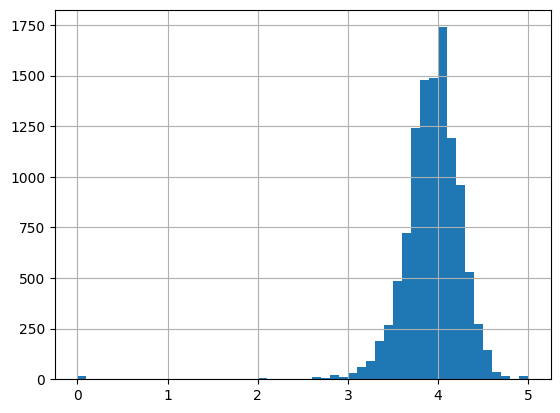

In [9]:
# It is obvious that ratings are densed between 3 and 5. 
# There are some outliers placed in value between 0 and 2.
df['average_rating'].hist(bins=50)

In [10]:
# I am dropping those outliers.
df = df[df['average_rating'] > 2]

<Axes: >

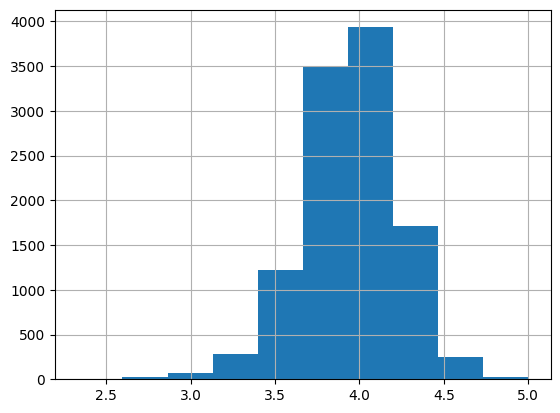

In [11]:
df['average_rating'].hist()

In [12]:
# There are some outliers with values starting with 0.
df['ratings_count'].value_counts(normalize=True).head()

# To get conscious result, I am dropping those outliers. I have set the boundary to 20 reviews.

df = df[df['ratings_count'] >= 20]

<Axes: >

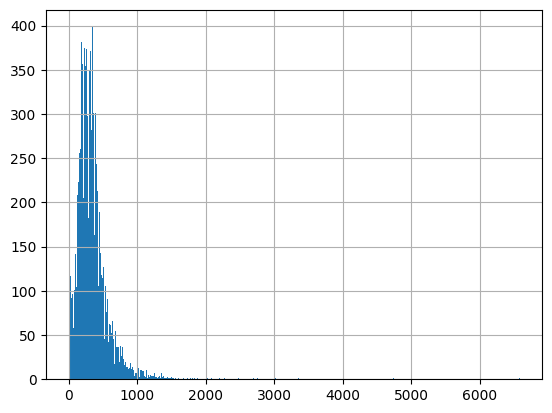

In [13]:
# There are some eoutliers with very high numbers. However as it is not really relevant, I will leave them.
df['num_pages'].hist(bins=500)

In [14]:
# However, it is not possible for a book to have less than 4 pages. Therefore, I will drop those books from the data.

df = df[df['num_pages']>=4]

In [15]:
# I am showing top 10 read books according to the rating counts.
# I do choose ratings count instead of average ratings, as average is highly affected with low rating counts.
sorted_df = df.sort_values(['ratings_count'], ascending=False)
print("Top 10 most read books with average ratings: ")
sorted_df[['average_rating','Title', 'Author']].head(10)

Top 10 most read books with average ratings: 


,average_rating,Title,Author
10340,3.59,Twilight (Twilight #1),Stephenie Meyer
1697,4.27,The Hobbit or There and Back Again,J.R.R. Tolkien
1462,3.80,The Catcher in the Rye,J.D. Salinger
307,3.89,Angels & Demons (Robert Langdon #1),Dan Brown
3,4.56,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré
4416,4.42,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré
1,4.49,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré
23,4.36,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien
2114,3.93,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl
0,4.57,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré


In [16]:
# I am showing top 10 books with most reviews.
sorted_df2 = df.sort_values('text_reviews_count', ascending=False)

print("10 most reviewed books with average ratings: ")
sorted_df2[['average_rating','Title', 'Author']].head(10)

10 most reviewed books with average ratings: 


,average_rating,Title,Author
10340,3.59,Twilight (Twilight #1),Stephenie Meyer
5272,4.37,The Book Thief,Markus Zusak/Cao Xuân Việt Khương
1069,4.13,The Giver (The Giver #1),Lois Lowry
284,3.86,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce
10704,4.09,Water for Elephants,Sara Gruen
7312,4.25,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan
5409,3.55,Eat Pray Love,Elizabeth Gilbert
2060,4.27,The Glass Castle,Jeannette Walls
1462,3.80,The Catcher in the Rye,J.D. Salinger
3,4.56,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré


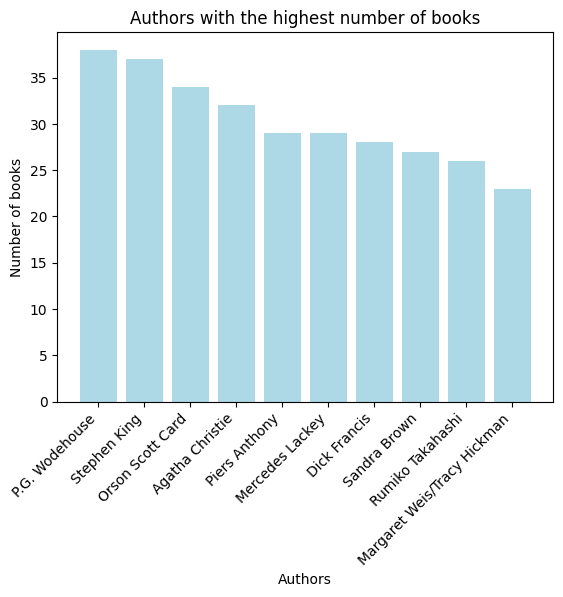

In [17]:
# Here I show 10 authors published highest number of books. 
top_authors = df['Author'].value_counts().head(10)

plt.bar(top_authors.index, top_authors, color = "lightblue")

plt.xlabel('Authors')
plt.ylabel('Number of books')
plt.title('Authors with the highest number of books')
# To fit the text into the table, I rotate it to right.
plt.xticks(rotation=45, ha='right')

plt.show()

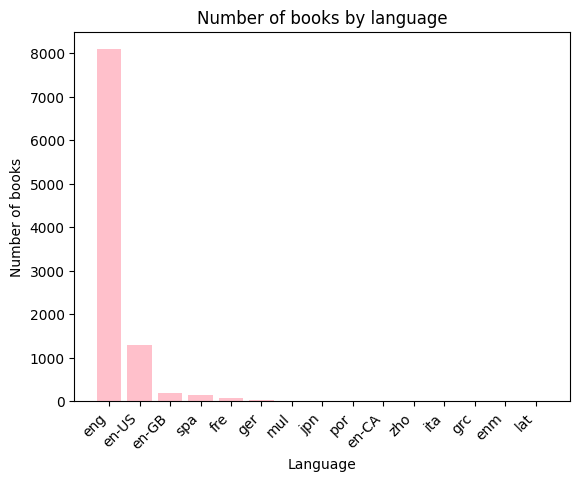

In [18]:
# Here, I am creating a bar chart showing the number of books by their published languages.
languages = df['language_code'].value_counts().head(15)

plt.bar(languages.index, languages, color = 'pink')

plt.xlabel('Language')
plt.ylabel('Number of books')
plt.title('Number of books by language')

plt.xticks(rotation=45, ha='right')

plt.show()

Text(0, 0.5, 'Average Rating')

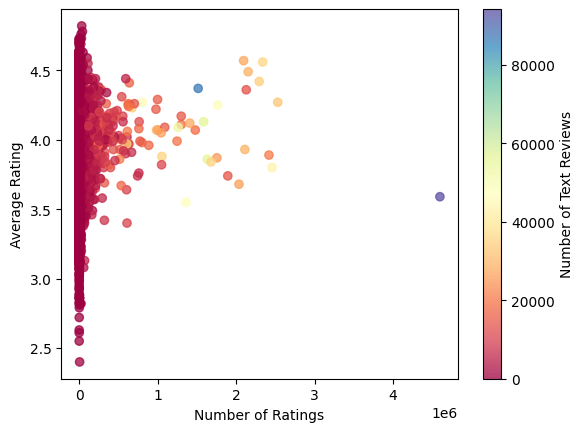

In [19]:
# I am writing the code for correlation table of average ratings and counts of ratings, with an emphasis on text reviews.
ratings = df['average_rating']
rating_num = df['ratings_count']
pages = df['text_reviews_count']

plt.scatter(rating_num, ratings, c = pages, cmap = 'Spectral', linewidths=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Number of Text Reviews')

plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')

In [20]:
# As the aim of this little project is no work on genres, I start working on genres column.
# I specifically change the typing in this column for the sake of usability.
df.loc[:, 'genres'] = df['genres'].str.lower()

In [21]:
# I am cheking the unique informations given in genres column.
df['genres'].value_counts()

genres
fiction                                                                                                                                                                           30
nonfiction                                                                                                                                                                        17
classics;cultural,russia;literature;literature,russian literature;philosophy;novels;literature,19th century;classics,classic literature;religion;historical,historical fiction    10
classics;poetry;fiction;fantasy,mythology;literature;fantasy;historical,historical fiction;academic,school;mythology,greek mythology;war                                          10
classics;fiction;horror;fantasy;gothic;literature;novels;literature,19th century;lgbt;classics,classic literature                                                                 10
                                                                                        

In [22]:
df.loc[:, 'genres'] = df['genres'].str.replace(';', '; ')

print(df['genres'].value_counts())

genres
fiction                                                                                                                                                                                    30
nonfiction                                                                                                                                                                                 17
classics; cultural,russia; literature; literature,russian literature; philosophy; novels; literature,19th century; classics,classic literature; religion; historical,historical fiction    10
classics; poetry; fiction; fantasy,mythology; literature; fantasy; historical,historical fiction; academic,school; mythology,greek mythology; war                                          10
classics; fiction; horror; fantasy; gothic; literature; novels; literature,19th century; lgbt; classics,classic literature                                                                 10
                                           

In [23]:
# I am splitting every unique genres with no spaces in the beginning or end, and adding them to a list called genres.
genres = df['genres'].str.split('; ', expand=True).stack().unique().tolist()
print(genres)

['fantasy', 'young adult', 'fiction', 'fantasy,magic', 'childrens', 'adventure', 'audiobook', 'childrens,middle grade', 'classics', 'science fiction fantasy', 'fantasy,supernatural', 'mystery', 'fantasy,paranormal', 'novels', 'paranormal,wizards', 'science fiction', 'humor', 'humor,comedy', 'european literature,british literature', 'nonfiction', 'science', 'history', 'science,physics', 'science,popular science', 'historical', 'philosophy', 'unfinished', 'travel', 'cultural,africa', 'autobiography,memoir', 'eastern africa,kenya', 'biography', 'travel,travelogue', 'language,writing', 'humanities,language', 'reference', 'humanities,linguistics', 'language,words', 'reference,dictionaries', 'writing,books about books', 'cultural,australia', 'writing,essays', 'literature,american', 'the united states of america', 'fantasy,epic fantasy', 'fantasy,high fantasy', 'literature', 'art', 'media tie in', 'culture,film', 'adult', 'computer science,programming', 'science,technology', 'computer science

In [24]:
# When I print the genres list, I realize there are some genres not seperated as they were written with ",".
# I first join every genres with a comma and assigning them to a list called "genre_string"
# Then I split each genres by ','.
genre_string = ','.join(genres)
genres_list = genre_string.split(',')

In [25]:
#  There are still some recurring genres, for that I use a loop to append unique genres to a list called 'unique_g'
unique_g = list(set(genres_list))

In [26]:
# Checking if I was able to get the list of unique genres.
print(len(unique_g), unique_g)


848 ['road trip', 'ancient', 'outdoors', '15th century', 'reportage', 'hackers', 'wine', 'new testament', 'love', 'physics', 'hip hop', 'spain', 'lovecraftian', 'warriors', 'love story', 'popular science', 'algeria', 'medieval history', 'sports', 'india', 'southern gothic', 'guidebook', 'social issues', 'science nature', 'harlequin desire', 'family', 'sewing', 'american', 'dying earth', 'pets', 'international development', 'judaism', 'singularity', 'walking', 'climbing', 'hinduism', 'transgender', 'contemporary', 'family law', 'combat', 'spanish literature', 'nigeria', 'detective', 'italy', 'martial arts', 'dark fantasy', 'stand up', 'metaphysics', 'world history', 'mountaineering', 'comic strips', 'fandom', 'post colonial', 'urban fantasy', 'grad school', 'church ministry', 'australia', 'apple', 'government', 'memoir', 'logic', 'international rel...', 'atlases', 'nobel prize', 'motorcycling', 'astronomy', 'western africa', 'green', 'geek', 'the americas', 'cults', 'own', '40k', 'cycli

In [27]:
print(f"I am an application that helps bookies to choose their next book to read.\n"
      f"You have {len(unique_g)} different number of genres.\n"
      f"I will first ask you to choose how many differen genres you want to enter. \n"
      f"You have at most 3 trials for each genre selection"
      f"Based on your genre selections, I will generate you 10 most rated books with the genres you have written.\n")

I am an application that helps bookies to choose their next book to read.
You have 848 different number of genres.
I will first ask you to choose how many differen genres you want to enter. 
You have at most 3 trials for each genre selectionBased on your genre selections, I will generate you 10 most rated books with the genres you have written.



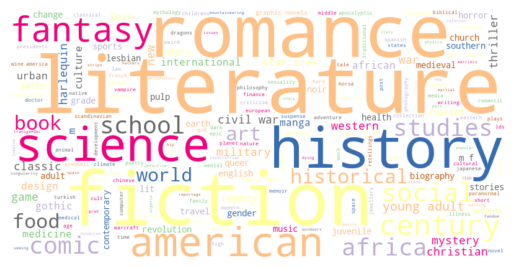

In [28]:
# I create a visual representation of genres, dependent on unique_g list, to show genres to readers in an appealing way.

text = ' '.join(unique_g)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Accent')

wordcloud.generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
# I create a little program which recommends readers for choosing their next books to read.
# It first asks user to enter how many genres they want to enter. They have 3 of trials for each genres.

selected_genres = []
num_of_trials = int(input("Please write how many genres you want to choose, please write a number: "))
print(f"You have chosen to write {num_of_trials} genres.")
for i in range(num_of_trials):
    trials = 0
    while trials < 3:
        try: # It asks which genres reader selects. If it is not available, it raises and error: "invalid genre".
            genre = input(f"Enter the genre {i+1} you're interested: ").lower()
            if genre not in unique_g:
                raise ValueError("Invalid genre.")
            break
        except ValueError as ve:
            print(ve, "Please try again")
            trials += 1
    else:
        print(f"You have reached the maximum number of trials for genre {i+1}. Moving on to the next genre.")
        continue

    selected_genres.append(genre) # It append the genres that are available in our unique_g list to selected_genres list.

 
print(f"The genres you have chosen are: {selected_genres}")


You have chosen to write 3 genres.
Invalid genre. Please try again
The genres you have chosen are: ['fiction', 'romance', 'literature']


In [30]:
# I create a filtered data frame that includes all the elements of 'selected genres' list in 'genres' column.

filtered_df = df[df['genres'].apply(lambda x: all(i in x for i in selected_genres))]

# Assigning selected_genres list to a string for better print results.
selected_genres_str = ', '.join(selected_genres)

# Creating a sorted_df data frame where I sort filtered_df elements by 'ratings_count'.
sorted_df = filtered_df.sort_values('ratings_count', ascending=False)

print(f"According to the genres you have chosen {selected_genres_str}:")
print("Top 10 books I have chosen for you by rank (Highest to Lowest):")
for i, row in enumerate(sorted_df.head(10).iterrows(), start =1):
    print(f"Rank {i}: {row[1]['Title']} by {row[1]['Author']}")

According to the genres you have chosen fiction, romance, literature:
Top 10 books I have chosen for you by rank (Highest to Lowest):
Rank 1: Romeo and Juliet by William Shakespeare/Paul Werstine/Barbara A. Mowat
Rank 2: Little Women by Louisa May Alcott
Rank 3: Jane Eyre by Charlotte Brontë/Michael Mason
Rank 4: Gone with the Wind by Margaret Mitchell
Rank 5: The Count of Monte Cristo by Alexandre Dumas/Robin Buss
Rank 6: Emma by Jane Austen/Fiona Stafford
Rank 7: Persuasion by Jane Austen/James Kinsley/Anna Massey/Richard S. Hartmetz/Maurgaux Motin/Deidre Shauna Lynch
Rank 8: Never Let Me Go by Kazuo Ishiguro
Rank 9: Love in the Time of Cholera by Gabriel García Márquez/Edith Grossman
Rank 10: Like Water for Chocolate by Laura Esquivel/Thomas  Christensen/Carol Christensen
